In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [7]:
x=df[['x']]
x.head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [9]:
y=df['y']
y.head()

0    4.447692
1    5.024612
2    5.869593
3    4.722490
4    4.877101
Name: y, dtype: float64

Text(0, 0.5, 'y')

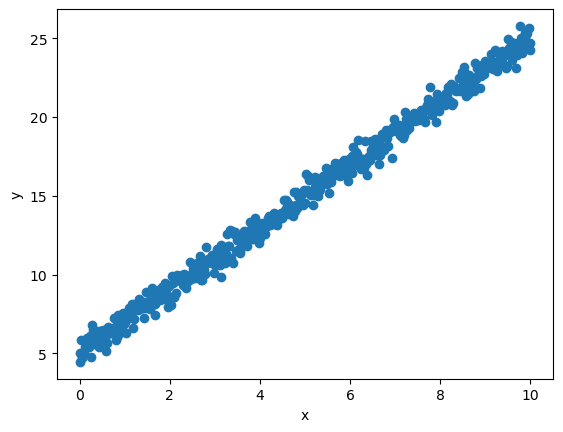

In [15]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [16]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [18]:
df1=pd.read_csv('nonlinear_data.csv')
df1.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [19]:
x1=df1[["x"]]
x1.head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [20]:
y1=df1['y']
y1.head()

0   -0.155043
1    0.081809
2   -0.014298
3    0.143978
4    0.019553
Name: y, dtype: float64

In [21]:
df1.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


Text(0, 0.5, 'Y1')

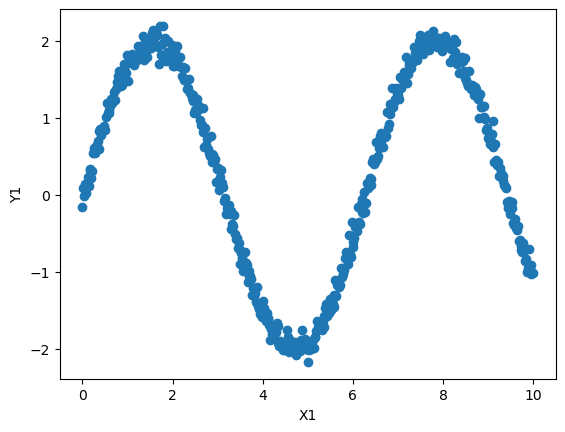

In [23]:
plt.scatter(x1,y1)
plt.xlabel("X1")
plt.ylabel("Y1")

In [108]:
df1.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


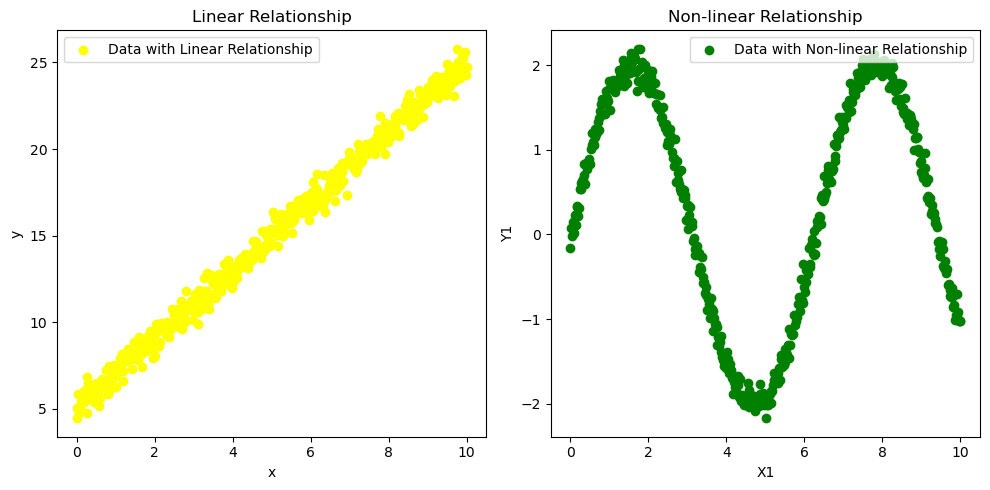

In [27]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.scatter(x,y, color ='yellow', label='Data with Linear Relationship')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)

plt.scatter(x1,y1, color ='green', label='Data with Non-linear Relationship')
plt.xlabel("X1")
plt.ylabel("Y1")
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

Linear

In [28]:
from sklearn.linear_model import LinearRegression

In [32]:
reg1 = LinearRegression()

In [33]:
reg1.fit(x,y)

LinearRegression()

In [34]:
reg1.score(x,y)

0.9928923730526016

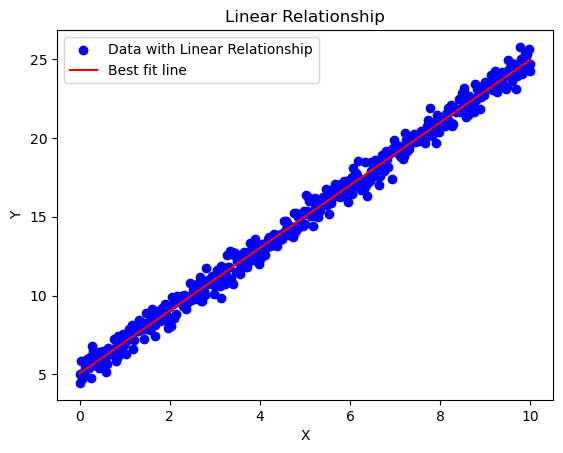

In [36]:
plt.scatter(x, y,color ='blue' , label='Data with Linear Relationship')
plt.plot(x, reg1.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(df1[['x']])

In [88]:
X_poly.shape

(500, 7)

In [89]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07
...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05


In [90]:
df1.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [82]:
reg_poly = LinearRegression()

In [91]:
reg_poly.fit(X_poly,df1.y)

LinearRegression()

In [99]:
reg_poly.score(X_poly, y)

-6.495698337208489

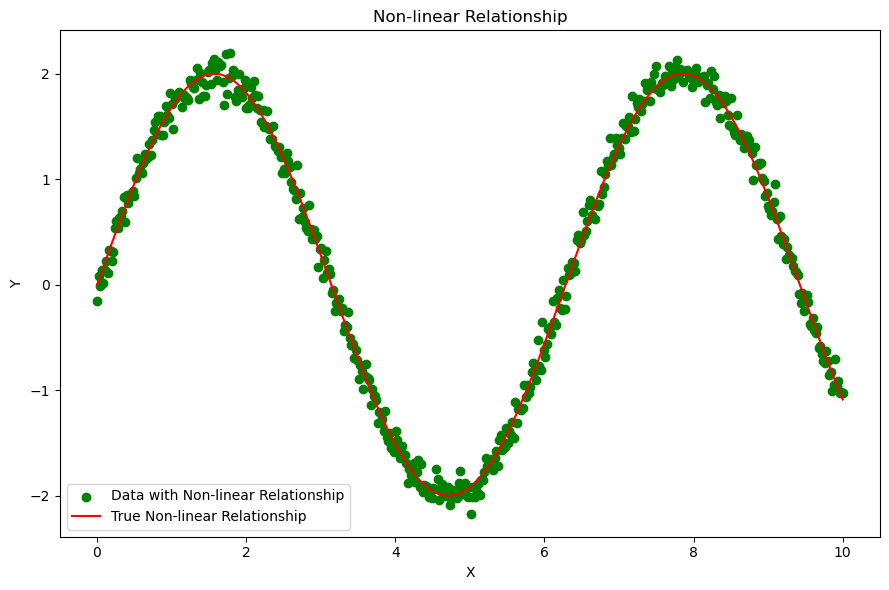

In [85]:
plt.figure(figsize=(9,6))

plt.scatter(x1,y1, color='green', label='Data with Non-linear Relationship')
plt.plot(x1, 2 * np.sin(x1), color='red', label='True Non-linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, df1.y, test_size=0.25, random_state=0)

In [102]:
xtrain.shape

(375, 7)

In [103]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6
0,1.0,4.789579,22.940069,109.873274,526.246743,2520.500434,12072.136349
1,1.0,1.182365,1.397986,1.652930,1.954366,2.310773,2.732177
2,1.0,8.136273,66.198931,538.612544,4382.298456,35655.574612,290103.472795
3,1.0,7.835671,61.397745,481.092554,3769.683139,29537.998144,231450.045574
4,1.0,8.236473,67.839487,558.758096,4602.195941,37905.862356,312210.609788
...,...,...,...,...,...,...,...
370,1.0,6.472946,41.899029,271.210145,1755.528591,11363.441579,73554.942488
371,1.0,3.847695,14.804760,56.964206,219.180913,843.341390,3244.920779
372,1.0,2.344689,5.497568,12.890090,30.223257,70.864150,166.154419
373,1.0,0.941884,0.887145,0.835588,0.787026,0.741287,0.698206


In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [105]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [106]:
reg_poly.score(xtrain, ytrain)

0.9932966451789856

In [107]:
reg_poly.score(xtest, ytest)

0.9921870558227948